In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

In [ ]:
from keras.datasets import reuters

In [ ]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [ ]:
print("Categories:",np.unique(train_labels))

Categories: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [ ]:
print("No of unique words :",len(np.unique(np.hstack(train_data))))

No of unique words : 9982


In [ ]:
length=[len(i) for i in train_data]
print("Average Review Length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review Length: 145.5398574927633
Standard Deviation: 146.0


In [ ]:
print("label:",train_labels[0])

label: 3


In [ ]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
#show the actual words
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3 ,"?") for i in train_data[1]])
print(decoded_review)

557056/550378 [==============================] - 0s 0us/step
? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    #creating a numpy array 
    results = np.zeros((len(sequences), dimension))
    for i , sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
#transform categories into numpy floats
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

In [ ]:
# Converts integers to binary class matrix
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model=models.Sequential()

# Input-Layer
model.add(layers.Dense(16,activation="relu",input_shape=(10000,)))

# Hidden-Layers
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(55,activation="relu"))
model.add(layers.Dropout(0.4, noise_shape=None, seed=None))
model.add(layers.Dense(85,activation="relu"))
model.add(layers.Dense(85,activation="relu"))
model.add(layers.Dense(85,activation="relu"))
model.add(layers.Dropout(0.4, noise_shape=None, seed=None))
model.add(layers.Dense(55,activation="relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(16,activation="relu"))

# Output-Layer
model.add(layers.Dense(46, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 55)                935       
_________________________________________________________________
dropout_2 (Dropout)          (None, 55)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 85)                4760      
_________________________________________________________________
dense_4 (Dense)              (None, 85)                7310      
_________________________________________________________________
dense_5 (Dense)              (None, 85)               

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"] 
)

In [ ]:
# creating validation set
x_val = x_train[:4000]
partial_x_train = x_train[4000:]
y_val = y_train[:4000]
partial_y_train = y_train[4000:]

In [ ]:
history = model.fit(
partial_x_train, partial_y_train,
epochs=10,
batch_size=512,
validation_data=(x_val,y_val)
)

Train on 4982 samples, validate on 4000 samples
Epoch 1/10
4982/4982 [==============================] - 1s 267us/step - loss: 0.1011 - accuracy: 0.9783 - val_loss: 0.0907 - val_accuracy: 0.9783
Epoch 2/10
4982/4982 [==============================] - 1s 131us/step - loss: 0.0800 - accuracy: 0.9812 - val_loss: 0.0711 - val_accuracy: 0.9844
Epoch 3/10
4982/4982 [==============================] - 1s 128us/step - loss: 0.0652 - accuracy: 0.9844 - val_loss: 0.0606 - val_accuracy: 0.9854
Epoch 4/10
4982/4982 [==============================] - 1s 126us/step - loss: 0.0557 - accuracy: 0.9866 - val_loss: 0.0554 - val_accuracy: 0.9880
Epoch 5/10
4982/4982 [==============================] - 1s 125us/step - loss: 0.0509 - accuracy: 0.9880 - val_loss: 0.0538 - val_accuracy: 0.9882
Epoch 6/10
4982/4982 [==============================] - 1s 126us/step - loss: 0.0487 - accuracy: 0.9884 - val_loss: 0.0531 - val_accuracy: 0.9882
Epoch 7/10
4982/4982 [==============================] - 1s 129us/step - loss

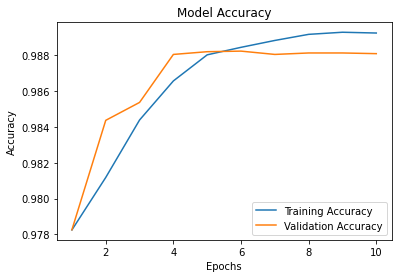

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]

plt.clf()

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, label = "Training Accuracy")
plt.plot(epochs, val_acc_values, label ="Validation Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print("Validation Accuracy:", np.mean(val_acc_values))

Validation Accuracy: 0.9864881992340088
